In [ ]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18


#GLOBAL VARIABLES

#ctes
mn=0.9315 # nucleon mass in GeV/c2
NA=6.022e23 # Avogadro's number
c=3e8 # speed of light in m/s
hbar = 6.582e-16 # eV*s
sqrtpi=m.sqrt(m.pi)

#DM halo
rho=0.3 # dark matter local density Gev/c2/cm3
vesc=544 # escape velocity in km/s

# Sun velocity
u1=np.array([ 0.9941, 0.1088, 0.0042])
u2=np.array([-0.0504, 0.4946, -0.8677])
v0=np.array([0, 238, 0]) # local standard of rest, km/s
v0M=m.sqrt(v0.dot(v0))
vpec=np.array([11.1, 12.2, 7.3]) # sun peculiar velocity
vsun=v0+vpec # SUN VELOCITY
omega=0.0172 # angular frequency, in d-1 (2pi/365)
vorb=29.8 # Earth's orbital velocity in km/s
timeMax=72.9 # day of maximum earth's velocity: 2nd June, starting from 22 March
timeMin=255.5 # day of minimum earth velocity, starting from 22 March
timeAvg=(timeMax+timeMin)/2.
ene=np.arange(0,1000,1)
time=np.arange(0,365,1)

#################
# EARTH VELOCITY, in km/s
#################
def vearth(t):
  v = vsun + vorb*(m.cos(omega*t)*u1+m.sin(omega*t)*u2)
  return m.sqrt(v.dot(v))
  #return np.linalg.norm(v)

#################
# minimum DM velocity to be detected with threshold E (in km/s)
# E in keV
# A: mass number
# mW: wimp mass in GeV/c^2
def vmin(E,A,mW):
  mN=A*mn
  mu_N=mW*mN/(mW+mN)
  return m.sqrt(E*mN*1e-6/2./mu_N/mu_N)*c*1e-3 # km/s
#################
# mean inverse speed function (in s/km)
# E in keV
# t: time in days since 22 March
# A: mass number
# mW: wimp mass in GeV/c^2
def eta(E,t,A,mW):
  x=vmin(E,A,mW)/v0M
  y=vearth(t)/v0M
  z=vesc/v0M
  N=m.erf(z)-2*z/sqrtpi*m.exp(-z*z)
  retval=1./2/y/v0M/N
  if x > z+y:
    return 0
  if x > z-y:
    retval*=m.erf(z)-m.erf(x-y)-2/sqrtpi*(z+y-x)*m.exp(-z*z)
  else:
    retval*=m.erf(x+y)-m.erf(x-y)-4/sqrtpi*y*m.exp(-z*z)
  return retval

#################
# Form factor
# E in keV
# A: mass number
def FF(E,A):
  if E==0:
    return 1
  R=1.2*A**0.3333 # fm
  s=1 # fm
  mN=A*mn
  R1=m.sqrt(R*R-5*s*s) # fm
  R1*=1e-6/hbar/c

  q=m.sqrt(2*1e-6*mN*E) # GeV
  x=q*R1
  #print("mN = " + str(mN) + " E= "+str(E)+ " q="+str(q)+" R1="+str(R1)+" x= " + str(x) + "hbarc= " +str(hbar*c*1e6))
  retval=m.sin(x)/x/x-m.cos(x)/x
  retval*=3/x
  retval*=retval
  aux=q*s*1e-6/hbar/c
  retval*=m.exp(-aux*aux)
  return retval


#########################
#########################
# differential rate in the detector (in c/kev/kg/y)
# E: in keV
# t: time in days since March 22
# mW: Wimp mass in GeV/c^2
# sigmaSI: SI cross section in cm^2
def rate(E,t,A,mW,sigmaSI):
  mN=A*mn
  Mdet=NA*mN*1000 # GeV/c2/kg
  mu_n=mW*mn/(mW+mn)
  retval=Mdet*rho/2./mW*A/mu_n/mu_n*sigmaSI*c*c
  retval*=8.64e-3 # to convert to counts/kg/keV/d
  retval*=365 # convert to counts/kg/keV/y
  retval*=FF(E,A)
  retval*=eta(E,t,A,mW)
  return retval

#########################
#########################
# total rate, integrated between Ei and Ef (in c/kg/y)
# Ei, Ef: Initial and final energies in keV
# t: time in days since March 22
# A: mass number
# mW: Wimp mass in GeV/c^2
# sigmaSI: SI cross section in cm^2
def totalRate(Ei,Ef,t,A,mW,sigmaSI):
  ene=np.arange(Ei,Ef,0.1)
  rates=np.array([rate(e,t,A,mW,sigmaSI) for e in ene])
  return rates.sum()*0.1


Text(0.5, 0, 'time (days since March 22)')

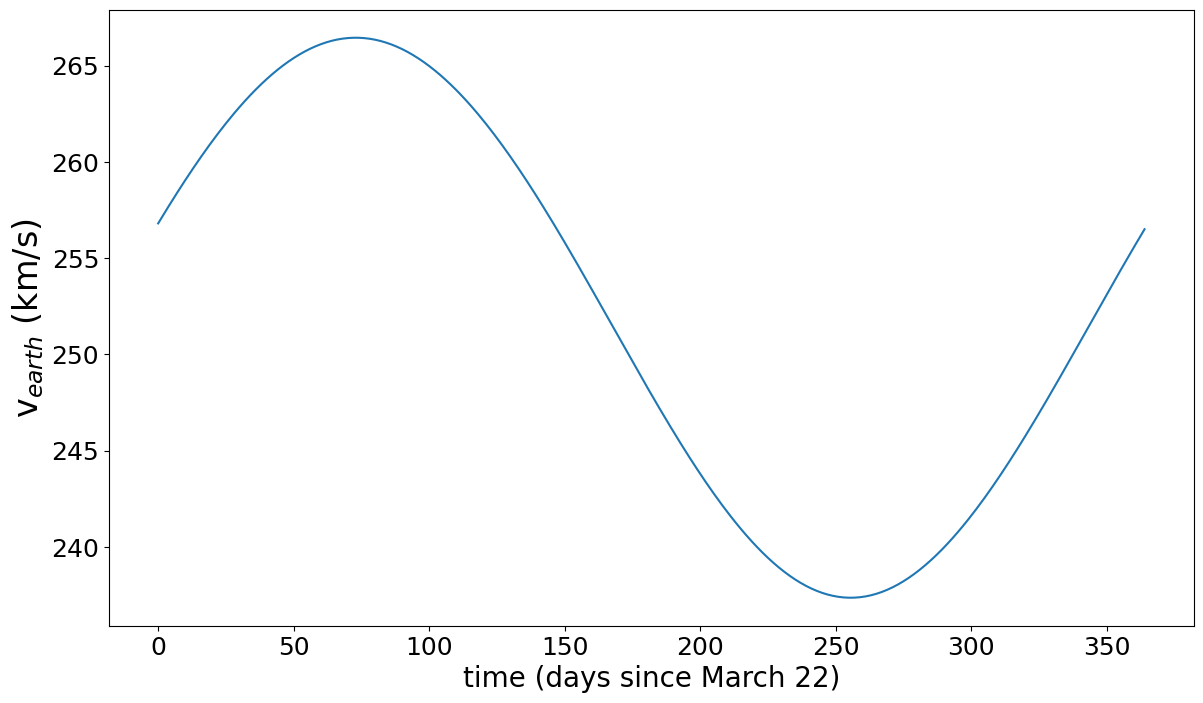

In [ ]:
# CHECK vearth
ve=np.array([vearth(t) for t in time]) #np.array([eta(e,timeAvg,132,70) for e in ene]) # Xe, mW=70GeV
plt.figure(figsize=(14, 8))
ax = plt.subplot()
ax.plot(time,ve)
ax.set_ylabel('v$_{earth}$ (km/s)',fontsize=24)
ax.set_xlabel('time (days since March 22)',fontsize=20)



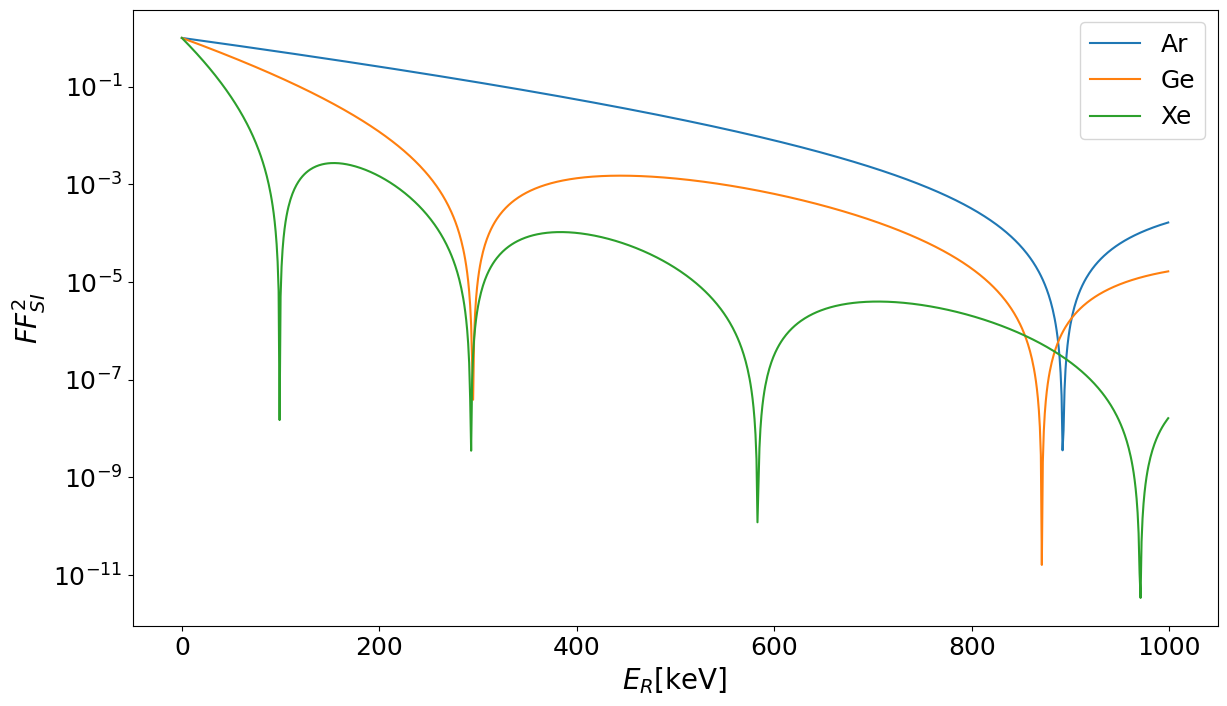

In [ ]:
# CHECK Form factor

ffAr=np.array([FF(e,40) for e in ene])
ffGe=np.array([FF(e,72) for e in ene])
ffXe=np.array([FF(e,132) for e in ene])
plt.figure(figsize=(14, 8))
ax = plt.subplot()
ax.plot(ene,ffAr, label = "Ar")
ax.plot(ene,ffGe, label = "Ge")
ax.plot(ene,ffXe, label = "Xe")
ax.set_ylabel(r'$FF^{2}_{SI}$',fontsize=20)
ax.set_xlabel(r'$E_{R}$'+ '[keV]',fontsize=20)
ax.legend()
ax.set_yscale("log")

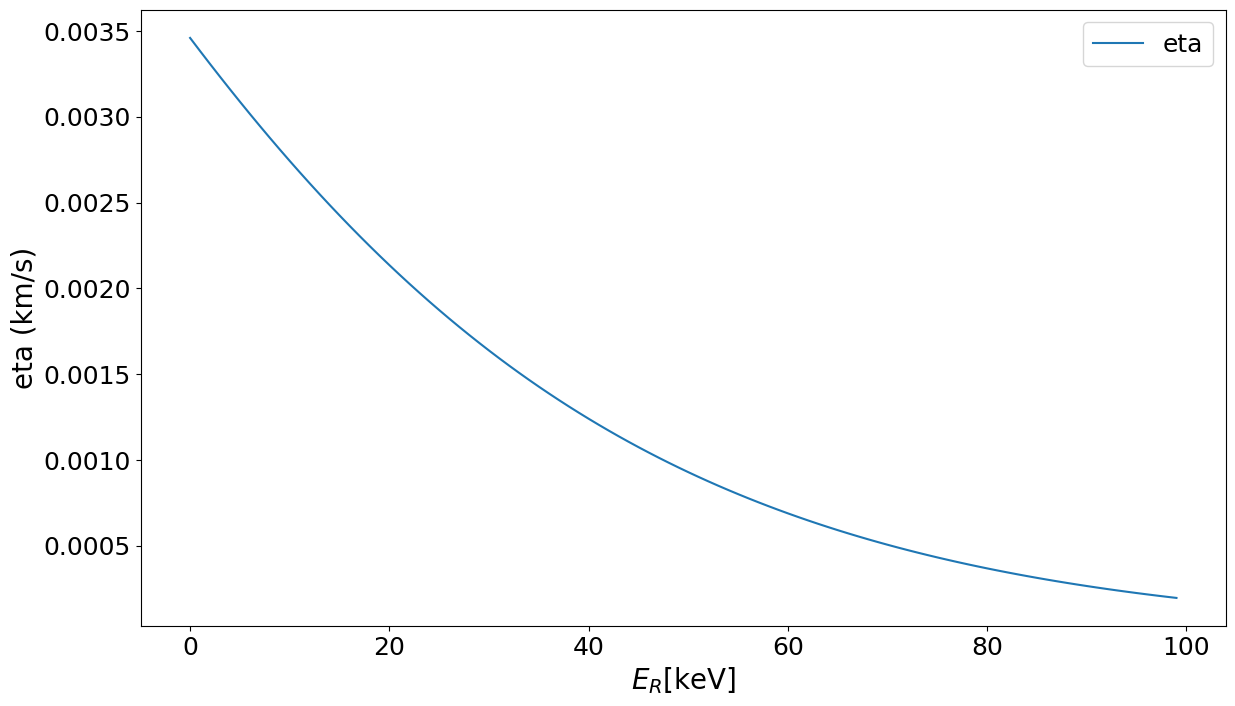

In [ ]:
# CHECK eta
etas=np.array([eta(e,timeAvg,132,70) for e in ene]) #np.array([eta(e,timeAvg,132,70) for e in ene]) # Xe, mW=70GeV
plt.figure(figsize=(14, 8))
ax = plt.subplot()
ax.plot(ene,etas, label = "eta")
ax.set_ylabel('eta (km/s)',fontsize=20)
ax.set_xlabel('$E_{R}$'+ '[keV]',fontsize=20)
ax.legend()


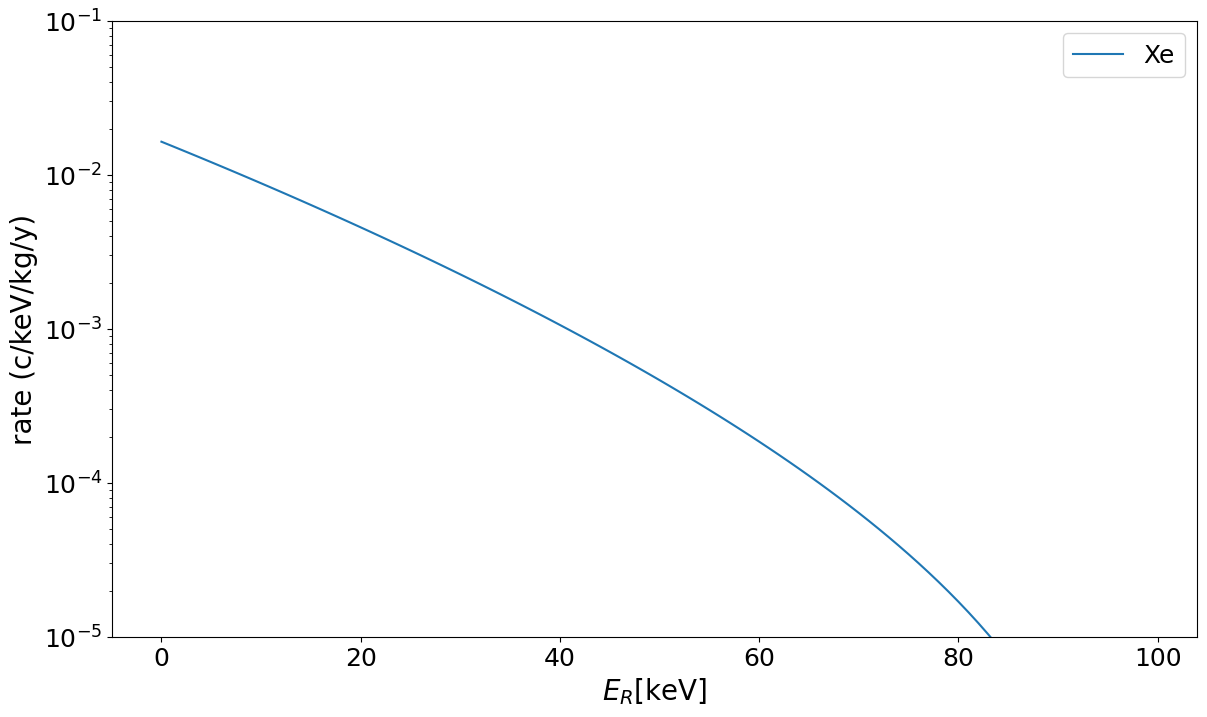

In [ ]:
# PLOT differential rate
mW=100
si=1e-45
rateXe=np.array([rate(e,timeAvg,132,mW,si) for e in ene])
plt.figure(figsize=(14, 8))
ax = plt.subplot()
ax.plot(ene,rateXe, label = "Xe")
ax.set_ylabel('rate (c/keV/kg/y)',fontsize=20)
ax.set_xlabel('$E_{R}$'+ '[keV]',fontsize=20)
ax.legend()
ax.set_ylim(1e-5, 0.1)
ax.set_yscale("log")